# Background considering the photopeak
gross area = $10064$ \
net area = $7241 \pm 328$ 

In [235]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
#plt.style.use(["science", "notebook"])
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (14, 8)


net_background = 7241 
net_error = 328
background_error = 891 #  50.72
gross_background = 90587 * (58.68/164.60)
mu_cu = 0.640 # cm^-1
mu_pb = 1.170 # cm^-1

((-0.1, 1.4805000000000001),
 None)

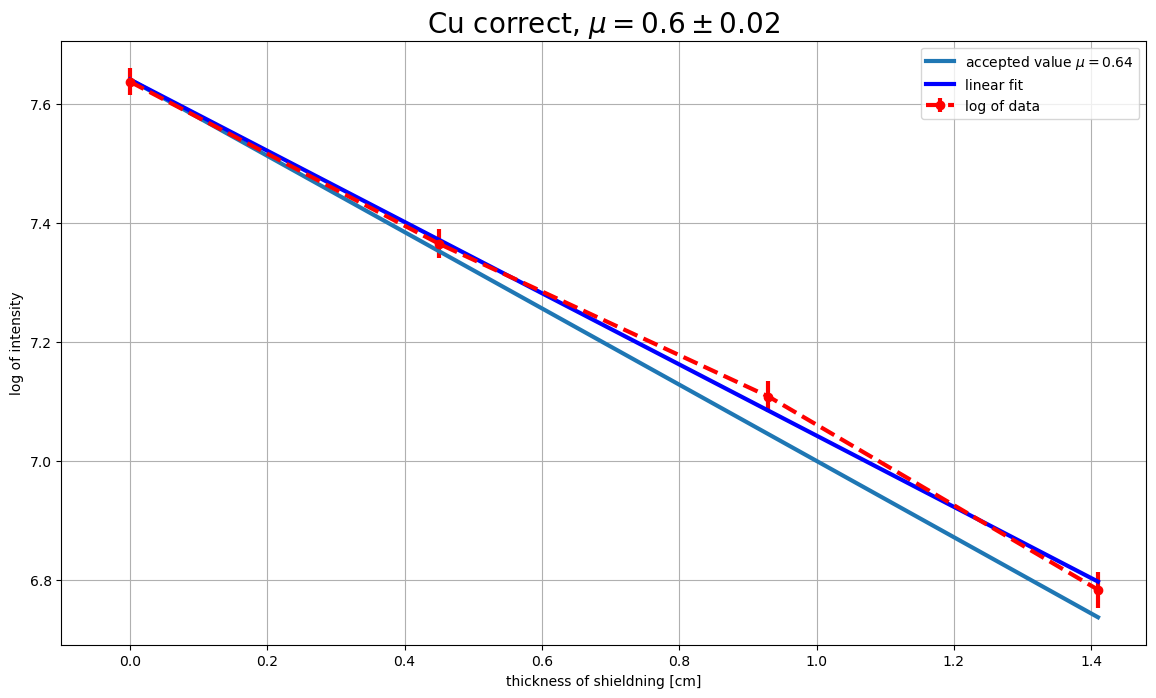

In [248]:
name = "Cu correct" # "Pb correct" "Cu incorrect" "Cu correct"
data = pd.read_csv("../NuclearPhysicsLab/" + name + ".txt")

# wierd data points in the end
if name == "Cu correct":
    data = data[:-2]

x_k, N_k, error_k, t_k = data.keys()
x = data[x_k].to_numpy().cumsum() / 10   # in cm

if "incorrect" in name:
    N = data[N_k].to_numpy() - gross_background
else: 
    N = data[N_k].to_numpy() - net_background
    
error = data[error_k].to_numpy()
t = data[t_k].to_numpy() # live time
I = N/t
I_background = I[0] # background intensity 
logI = np.log(I)
I_true = I - I_background # true intensity

dI_true = error - background_error # error of the true intensity
dx = 0.1/2 # error in thickness measurement [cm]
I0 = I_true[0] # true initial intensity

slope, intercept, r, p, std = stats.linregress(x, logI)

# dividing by I since the errors are shown in a log plot
s_poison = 1 / np.sqrt(N) # from the formula in appendix
s_lnI = std # errors in the data, maybe multiply 
s_area = error / t / I 
s_background = background_error / 50.72 / I
s_total = np.sqrt(s_lnI**2 + s_area**2 + s_background**2 + s_poison**2) # total error

# error for mu
A = np.sum(x / s_total**2) 
B = np.sum(1 / s_total**2) 
D = np.sum(x**2 / s_total**2) 

s_mu = np.sqrt(B / (B*D-A**2))

plt.title(name + f", $\mu = {-slope.round(2)}\pm{s_mu.round(2)}$", fontsize=20)
plt.errorbar(x, logI, fmt="--ro", yerr=s_total, label="log of data")
if "Cu" in name:
    plt.plot(x, -mu_cu*x+intercept, label=f"accepted value $\mu={mu_cu}$")
else:
    plt.plot(x, -mu_pb*x+intercept, label=f"accepted value: $\mu$={mu_pb}")
plt.plot(x, slope*x + intercept, "b", label="linear fit")
# plt.plot(x, A, "r-o") # plot for the true copper with wierd values
plt.xlabel("thickness of shieldning [cm]"), plt.ylabel("log of intensity")
plt.xlim(-0.1), plt.legend(), plt.grid()

# if name == "Cu correct":
#     plt.savefig(name + " modified" + ".png") 
# else:
#     plt.savefig(name + ".png")

# Error analysis of $\mu$

In [244]:
A = np.sum(x / s_total**2) 
B = np.sum(1 / s_total**2) 
D = np.sum(x**2 / s_total**2) 

s_mu = np.sqrt(B / (B*D-A**2))
s_mu

0.02491965235575006

In [239]:
s_total / slope

array([-0.03804831, -0.0403428 , -0.04368104, -0.05066632])